In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("D:\\Desktop\\Datasets\\city_day.csv")

In [3]:
dataset

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
df = pd.DataFrame(dataset)

In [5]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [6]:
import seaborn as sns

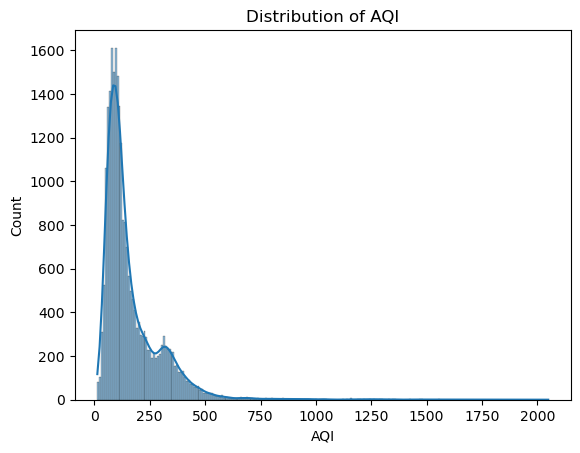

In [7]:
sns.histplot(df["AQI"],kde=True)
plt.title('Distribution of AQI')
plt.show()

In [8]:
df["PM2.5"].fillna(df["PM2.5"].mean(),inplace=True)
df["PM10"].fillna(df["PM10"].mean(),inplace=True)
df["NO"].fillna(df["NO"].mean(),inplace=True)
df["NO"].fillna(df["NO"].mean(),inplace=True)
df["NO2"].fillna(df["NO2"].mean(),inplace=True)
df["NOx"].fillna(df["NOx"].mean(),inplace=True)
df["NH3"].fillna(df["NH3"].mean(),inplace=True)
df["CO"].fillna(df["CO"].mean(),inplace=True)
df["SO2"].fillna(df["SO2"].mean(),inplace=True)
df["O3"].fillna(df["O3"].mean(),inplace=True)
df["Benzene"].fillna(df["Benzene"].mean(),inplace=True)
df["Xylene"].fillna(df["Xylene"].mean(),inplace=True)
df["Toluene"].fillna(df["Toluene"].mean(),inplace=True)
df["AQI"].fillna(df["AQI"].mean(),inplace=True)

In [9]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [10]:
features = df[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2']]
target = df['AQI']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [13]:
sc = StandardScaler()

In [14]:
x_train = sc.fit_transform(x_train)

In [15]:
x_test = sc.fit_transform(x_test)

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [18]:
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [19]:
y_pred = rf_model.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

In [21]:
mean_squared_error_ = mean_squared_error(y_test,y_pred)

In [22]:
mean_squared_error_

2153.896478324548

In [23]:
r2_score = r2_score(y_test,y_pred)

In [24]:
r2_score

0.8571264260976643

In [25]:
print(f"Random Forest Mean Absolute Error: {mean_squared_error_}")
print(f"Random Forest R² Score: {r2_score}")

Random Forest Mean Absolute Error: 2153.896478324548
Random Forest R² Score: 0.8571264260976643


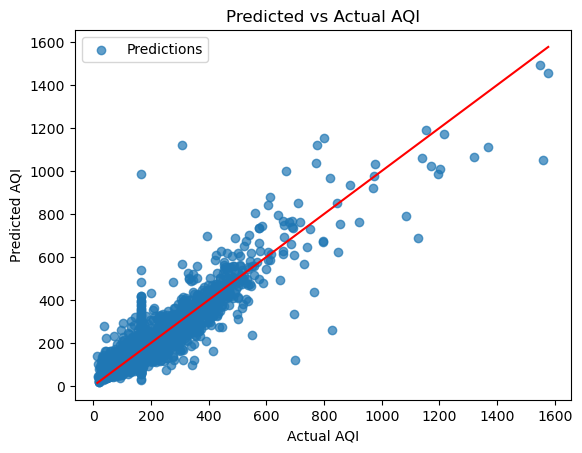

In [28]:
plt.scatter(y_test, y_pred, label='Predictions', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Predicted vs Actual AQI')
plt.legend()
plt.show()